# Assignment 1 - Starting with Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading data 
dataset = pd.read_csv('cricketers.csv', sep = "\t")
print(dataset.shape)
dataset.head()

(109, 14)


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [2]:
dataset.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


### 1. Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale.  So, in this first task, normalize all data attributes. [2 points]

In [3]:
datasetNew = dataset.drop(['PLAYER'],axis=1)
datasetNew

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.00,0.00
1,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.00,0.00
2,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.00,0.00
3,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.00,0.00
4,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0.00,0.00,3,4.0,42,1,42.00,10.50
105,0,0,0,0,0,0.00,0.00,6,19.0,204,4,51.00,10.73
106,0,0,0,0,0,0.00,0.00,6,22.0,229,4,57.25,10.40
107,0,0,0,0,0,0.00,0.00,4,10.1,114,5,22.80,10.20


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(datasetNew)
data_scaled
# Note: We can use min max scaling or robust scaling to achieve the same.

array([[ 0.08571729,  0.2238462 , -0.21834202, ..., -0.70415503,
        -0.7948098 , -1.08383228],
       [ 0.47501666,  0.62713935,  1.68780401, ..., -0.70415503,
        -0.7948098 , -1.08383228],
       [-1.2768305 , -0.98603325, -0.60948759, ..., -0.70415503,
        -0.7948098 , -1.08383228],
       ...,
       [-1.86077956, -1.59097298, -0.95656042, ...,  0.01316178,
         1.8301237 ,  1.10495555],
       [-1.86077956, -1.59097298, -0.95656042, ...,  0.19249098,
         0.25057856,  1.06286347],
       [-1.86077956, -1.59097298, -0.95656042, ...,  0.90980778,
         0.23407243,  1.02918982]])

In [5]:
# The mean and the standard deviation after performing the Normalization
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-1.75191156e-16  8.55584716e-17  1.01855323e-17 -1.01855323e-16
 -3.25937035e-17 -1.22226388e-17 -5.70389811e-17  1.16624345e-16
 -7.33358328e-17  6.11131940e-18 -3.05565970e-18  5.37286831e-17
 -1.38523240e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 2. Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output. [3 points]

In [6]:
dataset = pd.read_csv('cricketers.csv', sep = "\t")
print(dataset.shape)
dataset.head()

(109, 14)


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [7]:
#Since we are interested in only average runs and bowling economy let's drop all the values
#and scale the data using Z Score normalization
dataset = dataset.drop(['PLAYER','matches_played','innings_batted','runs_scored','highest_runs','balls_faced','strike_rate'], axis =1)
#datasetNew1 = datasetNew.loc[:,df.columns.intersection(['average_runs','bowling_economy'])]
#datesetNew1
dataset


,average_runs,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,16.75,0,0.0,0,0,0.00,0.00
1,53.33,0,0.0,0,0,0.00,0.00
2,63.00,0,0.0,0,0,0.00,0.00
3,28.46,0,0.0,0,0,0.00,0.00
4,24.66,0,0.0,0,0,0.00,0.00
...,...,...,...,...,...,...,...
104,0.00,3,4.0,42,1,42.00,10.50
105,0.00,6,19.0,204,4,51.00,10.73
106,0.00,6,22.0,229,4,57.25,10.40
107,0.00,4,10.1,114,5,22.80,10.20


In [8]:
dataset = dataset.drop(['innings_bowled','overs','runs_given','wickets_obtained'], axis=1)
dataset

,average_runs,average_runs_per_wicket,bowling_economy
0,16.75,0.00,0.00
1,53.33,0.00,0.00
2,63.00,0.00,0.00
3,28.46,0.00,0.00
4,24.66,0.00,0.00
...,...,...,...
104,0.00,42.00,10.50
105,0.00,51.00,10.73
106,0.00,57.25,10.40
107,0.00,22.80,10.20


In [9]:
dataset = dataset.drop(dataset.columns[[1]], axis=1)
dataset

,average_runs,bowling_economy
0,16.75,0.00
1,53.33,0.00
2,63.00,0.00
3,28.46,0.00
4,24.66,0.00
...,...,...
104,0.00,10.50
105,0.00,10.73
106,0.00,10.40
107,0.00,10.20


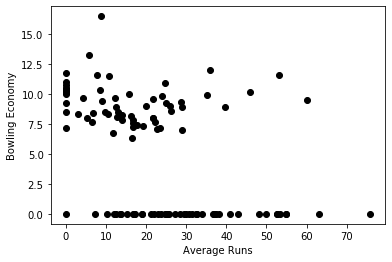

In [10]:
# View of how the raw data looks
Y = dataset.iloc[:, [0, 1]].values


plt.scatter(Y[:,0],Y[:,1],c='black',label='unclustered data')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(dataset)
data_scaled

array([[-3.50204799e-01, -1.08383228e+00],
       [ 1.93326794e+00, -1.08383228e+00],
       [ 2.53690876e+00, -1.08383228e+00],
       [ 3.80781143e-01, -1.08383228e+00],
       [ 1.43569650e-01, -1.08383228e+00],
       [ 1.28842722e+00, -1.08383228e+00],
       [ 3.97011403e-01,  8.90285973e-01],
       [-1.06308776e+00,  5.99850665e-01],
       [-5.63695142e-01,  6.79825605e-01],
       [ 1.02369759e-01,  9.95516157e-01],
       [-3.76422911e-01,  6.37733531e-01],
       [-9.90051588e-01,  5.28294140e-01],
       [-7.49146194e-02, -1.08383228e+00],
       [ 1.64793836e-01,  8.60821521e-01],
       [ 1.15608818e+00, -1.08383228e+00],
       [ 6.47331952e-01, -1.08383228e+00],
       [ 1.47569945e+00,  1.06496808e+00],
       [-8.65203434e-01,  1.09653713e+00],
       [ 2.39702729e-01,  7.26126886e-01],
       [-6.09264719e-01, -1.08383228e+00],
       [-1.04248781e+00,  1.70687220e+00],
       [-3.70804744e-01,  2.48381851e-01],
       [-5.84295088e-01,  7.11394660e-01],
       [ 9.

In [12]:
X = data_scaled


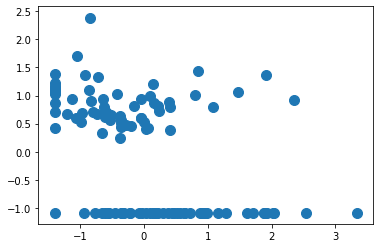

In [13]:
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [14]:
colors = 10*["r","b","c","g","k"]

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
            # Compute the distances
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break



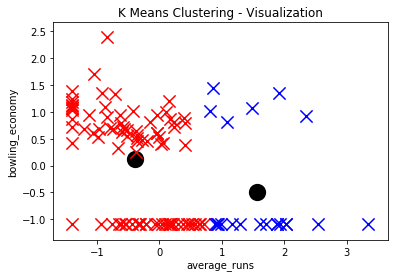

In [15]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.title('K Means Clustering - Visualization')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.show()

### 3. Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document,  and comment on which is better clustering (and reasons) based on visualization only. [3 points]

### Running the algorithm for K=2.

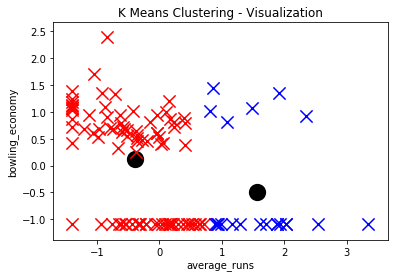

In [20]:
clf = K_Means(2,0.01,300)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.title('K Means Clustering - Visualization')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')        
plt.show()

### Running the algorithm for K=3

In [ ]:
clf = K_Means(3,0.01,300)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.title('K Means Clustering - Visualization')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')        
plt.show()

### Running the algorithm for K=4

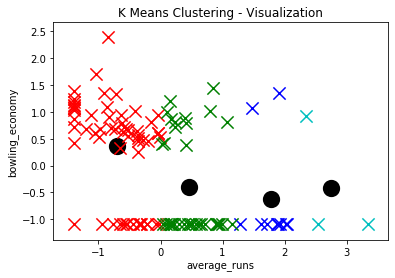

In [17]:
clf = K_Means(4,0.01,300)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.title('K Means Clustering - Visualization')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')        
plt.show()

### Running the algorithm for K=5

28.382900984503294
114.17984222149781
34.397565111859876
75.54522856440806
6.049488440880071
30.84382424049513
1877.70576608638
31.36305445223595
7.705041842903913
81.50003325572787


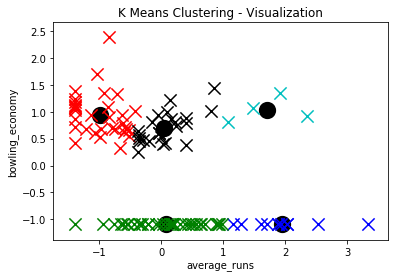

In [18]:
clf = K_Means(5,0.01,300)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.title('K Means Clustering - Visualization')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')        
plt.show()

### Using the Elbow method to check the optimal value of K

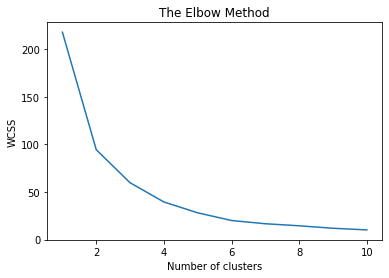

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()